# **Classification and Clustering (based on EdX IBM Introduction to ML course)**

# Classification

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

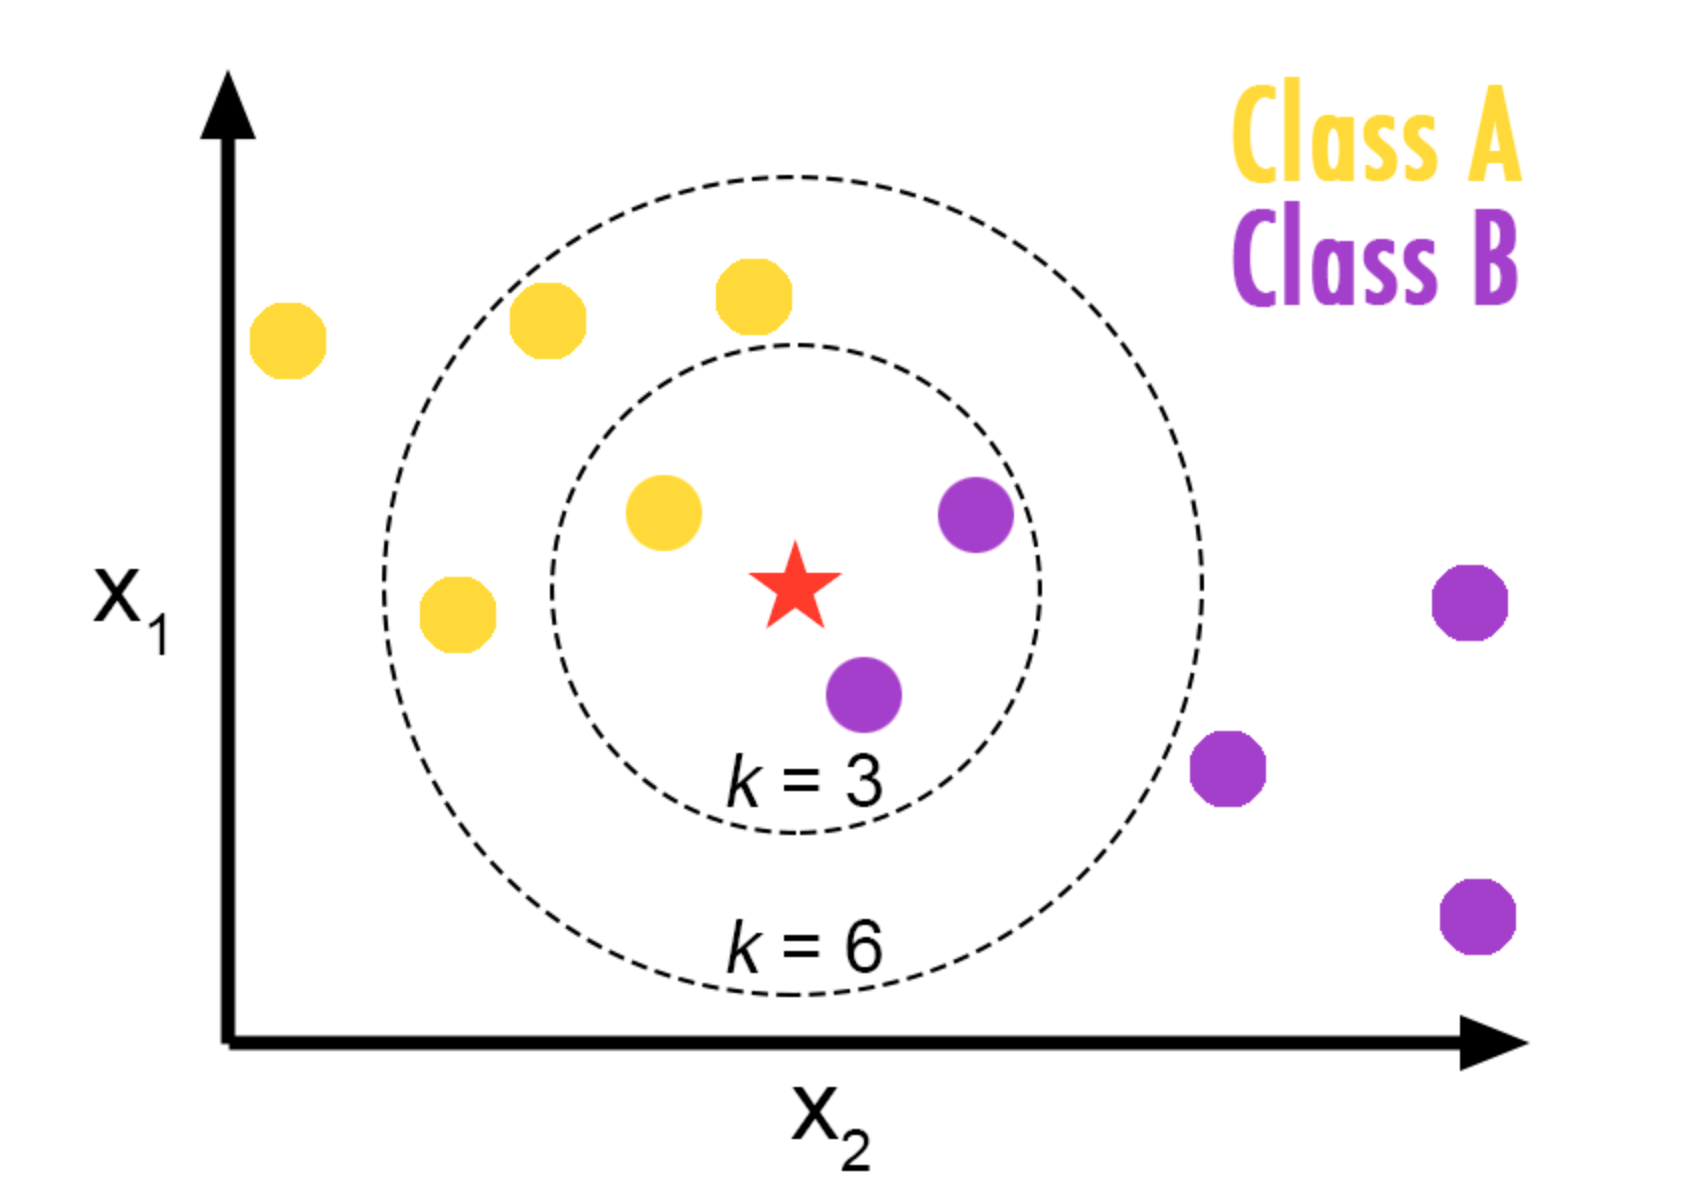


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A. In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.

In [2]:
!pip3 install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

**The Data**
Imagine a world where you care about exoplanet and you want to classify them. From the archive, you already know what people canonically call: Hot Jupiters, hot Neptunes, Savanna planets, super-Earths etc.
But these categories are not set in stone but rather on a case by case basis. How does a novice exoplaneteer label their new planet?
Our classes: 1. hot Jupiters, 2. warm Jupiters, 3. hot Neptunes, 4. Savanna Planets, 5. Lava Planets, 6. super-Earths

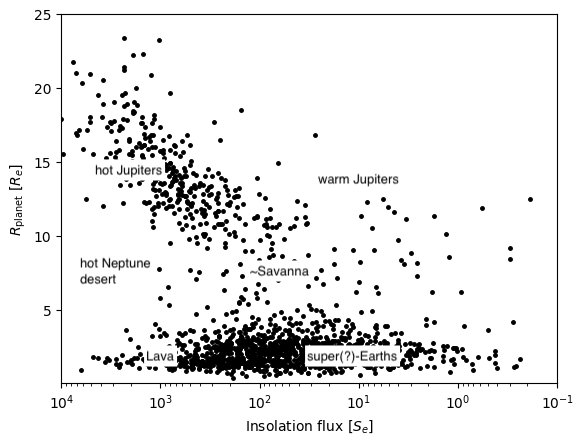


In [4]:
#load the data here: radius (in Jupiter radii), mass (in Jupiter masses), semi-major axis (in AU), T star (in K)
X = np.array([
 [1.854, 0.894, 0.0330, 6250.],
 [1.865, 1.157, 0.02544, 6460.],
 [1.619, 1.99, 0.05053, 7996.],

 [1.2, 4.0, 0.155, 6532.0],
 [1.17, 1.234, 0.1038, 6295.],
 [0.813, 0.987, 0.1796, 5370.],

 [0.6155, 0.102, 0.0668, 6050.],
 [0.57, 0.0585, 0.0479, 5079.],
 [0.612, 0.1123, 0.105, 5609.],

 [0.406, 0.0771, 0.15, 3180.],
 [0.633, 0.07, 0.25, 6018.],
 [0.46, 0.07, 0.11, 3505.],

 [0.17, 0.027, 0.015, 5250.],
 [0.135, 0.016, 0.012, 4599.],
 [0.15, 0.014, 0.03, 4552.],

 [0.144, 0.103, 0.427, 4900.],
 [0.154, 0.022, 0.0936, 3131.],
 [0.174, 0.011, 0.36, 4200.]
              ])
y = np.array([1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6])

**Step 1: Normalise** Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X)

[[ 1.98772108  0.28599417 -0.78682766  0.77938481]
 [ 2.00680089  0.54903479 -0.85289386  0.94750136]
 [ 1.58010696  1.38216346 -0.63363447  2.1771539 ]
 [ 0.85333967  3.39247394  0.27932001  1.00514133]
 [ 0.80130382  0.62604669 -0.16811246  0.81540978]
 [ 0.18207727  0.37900853  0.49429732  0.07489637]
 [-0.16049204 -0.50612817 -0.49145232  0.6192738 ]
 [-0.23941307 -0.54963489 -0.65661782 -0.15806514]
 [-0.16656288 -0.49582658 -0.15762576  0.26622903]
 [-0.52387568 -0.53103201  0.23562543 -1.67831916]
 [-0.13013779 -0.53813311  1.10951696  0.59365604]
 [-0.43021116 -0.53813311 -0.11393118 -1.41813878]
 [-0.93322432 -0.58113975 -0.94412813 -0.02117023]
 [-0.99393281 -0.59214145 -0.97034488 -0.54233156]
 [-0.96791489 -0.59414176 -0.81304441 -0.57995765]
 [-0.97832206 -0.50512801  2.65630497 -0.3013645 ]
 [-0.96097678 -0.58614052 -0.25724939 -1.71754636]
 [-0.92628621 -0.59714222  2.07079765 -0.86175302]]


**Step 2: Split the data in the training data and testing data** Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16, 4) (16,)
Test set: (2, 4) (2,)


**Step 3: Classification with K nearest neighbour (KNN)**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Training:

In [14]:
k = 3
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

Testing: We can use the model to make predictions on the test set

In [15]:
yhat = neigh.predict(X_test)
print(yhat)
print(y_test)

[3 2]
[3 2]


**Step 4: Evaluation** In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.875
Test set Accuracy:  1.0


**Step 5: Usage**

In [19]:
new_planet = neigh.predict([[1.57, 0.47, 0.07, 6900.]])
print(new_planet)

[1]


# Clustering

There are many models for clustering out there and by far the most basic is K-means. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from unlabeled data. Here we will use it on everyone's favourite: exoplanets!

In [21]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

**Step 1:** Load the data

In [54]:
import numpy as np
import urllib.request

# URLs of the .npy files on GitHub
url_radii = "https://github.com/jseideleso/python-coffee_ML_intro/raw/main/radii.npy"
url_insole = "https://github.com/jseideleso/python-coffee_ML_intro/raw/main/insol.npy"

# Download and save the files
urllib.request.urlretrieve(url_radii, 'radii.npy')
urllib.request.urlretrieve(url_insole, 'insol.npy')

# Load the .npy files
radii = np.load('radii.npy')
insol = np.load('insol.npy')
insole = insol[radii>0.01]
radii = radii[radii>0.01]
radii = radii[insole<15000.]
insole = insole[insole<15000.]


<ipython-input-55-a61809a3c336>:1: RuntimeWarning: divide by zero encountered in log10
  log_ins = np.log10(insole)


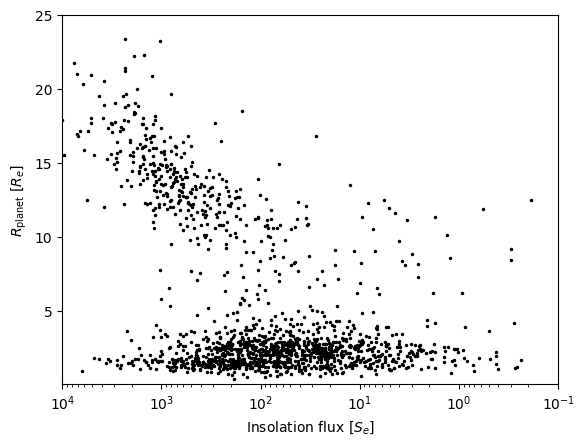

In [55]:
log_ins = np.log10(insole)
plt.plot(insole , radii, color='k', linestyle="None", alpha=1.0, zorder=1, marker='.', ms=3)
plt.xlabel(r'Insolation flux [$S_e$]')
plt.ylabel(r'$R_{\mathrm{planet}}$ [$R_e$]')
plt.ylim(0.01, 25.)
plt.xlim(10000., 0.1)
plt.xscale('log')
plt.show()

**Setting up k-means**
The KMeans class has many parameters that can be used, but we will be using these three:

1.   init: Initialization method of the centroids.
*   Value will be: "k-means++"
*   k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

2.   n_clusters: The number of clusters to form as well as the number of centroids to generate.
*   Value will be: 4 (Hot Jupiters, Savanna, Lava, super-Earth)
3.   n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
*  Value will be: 12

Initialize KMeans with these parameters, where the output parameter is called k_means.

In [75]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)

In [76]:
X_pre = np.column_stack((insole,radii))

#now we normalise to make things easier on the algorithm
from sklearn.preprocessing import StandardScaler
X_pre = np.nan_to_num(X_pre)
X = StandardScaler().fit_transform(X_pre)
print(X)

[[-0.30691576  2.49073446]
 [-0.30691576  1.26917029]
 [ 3.41219974 -0.490586  ]
 ...
 [ 1.26735154  3.97018671]
 [ 2.04707336  2.33340386]
 [ 0.16611224 -0.46293269]]


In [77]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
print("Cluster centers:\n", k_means.cluster_centers_)
print("Labels for each point:\n", k_means.labels_)

Cluster centers:
 [[ 0.08948006  1.75841064]
 [-0.22600913 -0.41557575]
 [ 9.37119726  2.45051146]
 [ 2.63974074  2.68031504]
 [ 2.35476153 -0.4742216 ]]
Labels for each point:
 [0 0 4 ... 3 3 1]


**Creating the visual plot**

0.08948005866585829 1.7584106358989953
-0.22600913260157862 -0.41557574945511416
9.371197262087257 2.450511455611144
2.639740741353448 2.680315044582566
2.354761533802983 -0.4742216021694354


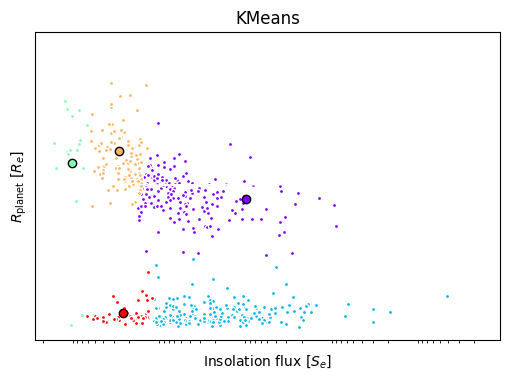

In [88]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.rainbow(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(set(k_means_labels))), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    print(cluster_center[0], cluster_center[1])

# Title of the plot
ax.set_title('KMeans')


ax.set_xlim(25., 0.0001)
ax.set_ylim(-1., 5.)
ax.set_xscale('log')

#ax.set_xlim(12., -1.)
#ax.set_ylim(-1., 5.)

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

plt.xlabel(r'Insolation flux [$S_e$]')
plt.ylabel(r'$R_{\mathrm{planet}}$ [$R_e$]')
# Show the plot
plt.show()

You can also try this with other clustering methods: Hierarchical clustering, agglomerate clustering, DB-SCAN etc.